# Customer Churn Analysis
### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

____

##### Install these libraries before you proceed

In [1]:
!pip install pandas-profiling -q
!pip install sweetviz -q
!pip install lime -q

# Importing the Libraries

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the Dataset

In [132]:
# Download the Excel file as it is

df = pd.read_csv("D:\Telecom_customer_churn.csv")

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95       1889.50    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#### List of column names

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Let's observe if we have any NaN values in the given dataset

#### We can see from the below that we do not have missing values and all values are accounted for

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We can observe the same result in plot format ( just for reference)

<AxesSubplot:>

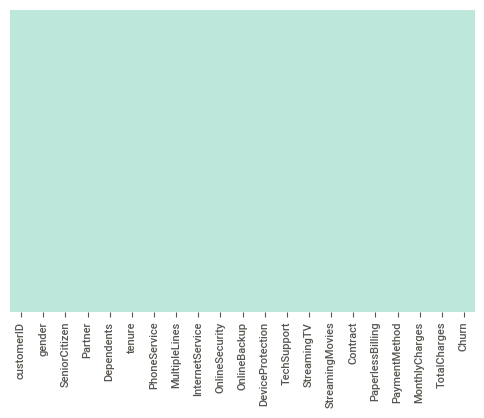

In [99]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="icefire")

In [93]:
df.drop(['TotalCharges', 'customerID'], axis = 1, inplace=True)

### We can see there are 269 records and 71 features and all these features are categorical in nature

In [12]:
df.shape

(7043, 19)

### Using "Info" we got to know we have only 1 Int type feature and rest all 70 are categotical features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Since the describe method works only on numerical  data (both on continous or converted data) I have used "df2" file of dataset

#### We can clearly see there is that mean is greater than std, which is correct. In some cases, we find the opposite scenario which could mean the data was incorrectly entered or some human error took palce.

#### Although this dataset doesn't consist all the neumerical values, I shall convert the remaining using encoding techniques.

In [14]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

# Explore the dataset with Pandas Profiling

#### The following library helps in analyzing the dataset to give us some understanding on individual features

In [133]:
from pandas_profiling import ProfileReport

In [134]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [135]:
# run this line if you want to generate the report in HTML

profile.to_file("churn_report_profiling.html")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [136]:
# run this line if you want to generate the report in Notebook itself

profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### I have used SweetViz library for simple EDA for better understanding

In [137]:
import sweetviz as sv
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [138]:
# run this line if you want to generate the report in HTML

sweet_report.show_html(filepath='churn_report_sweetviz.html', 
                        open_browser=True, 
                        layout='widescreen', 
                        scale=None)

Report churn_report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



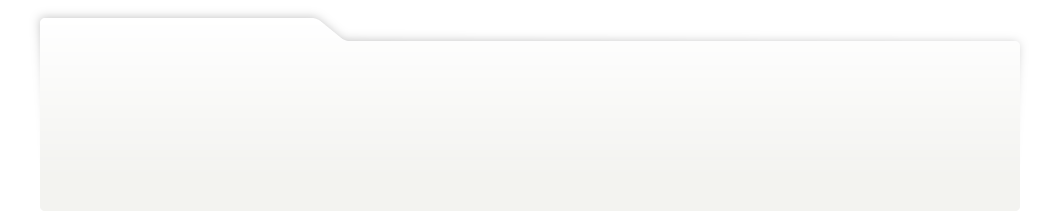
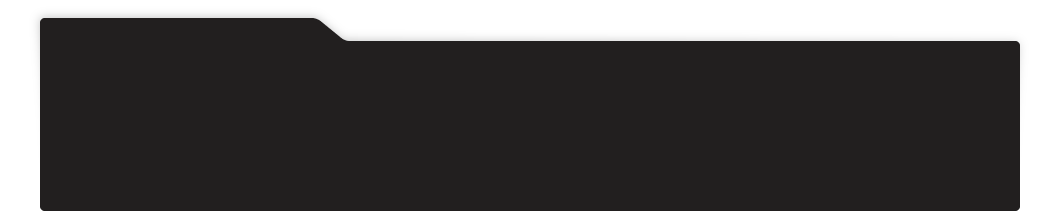
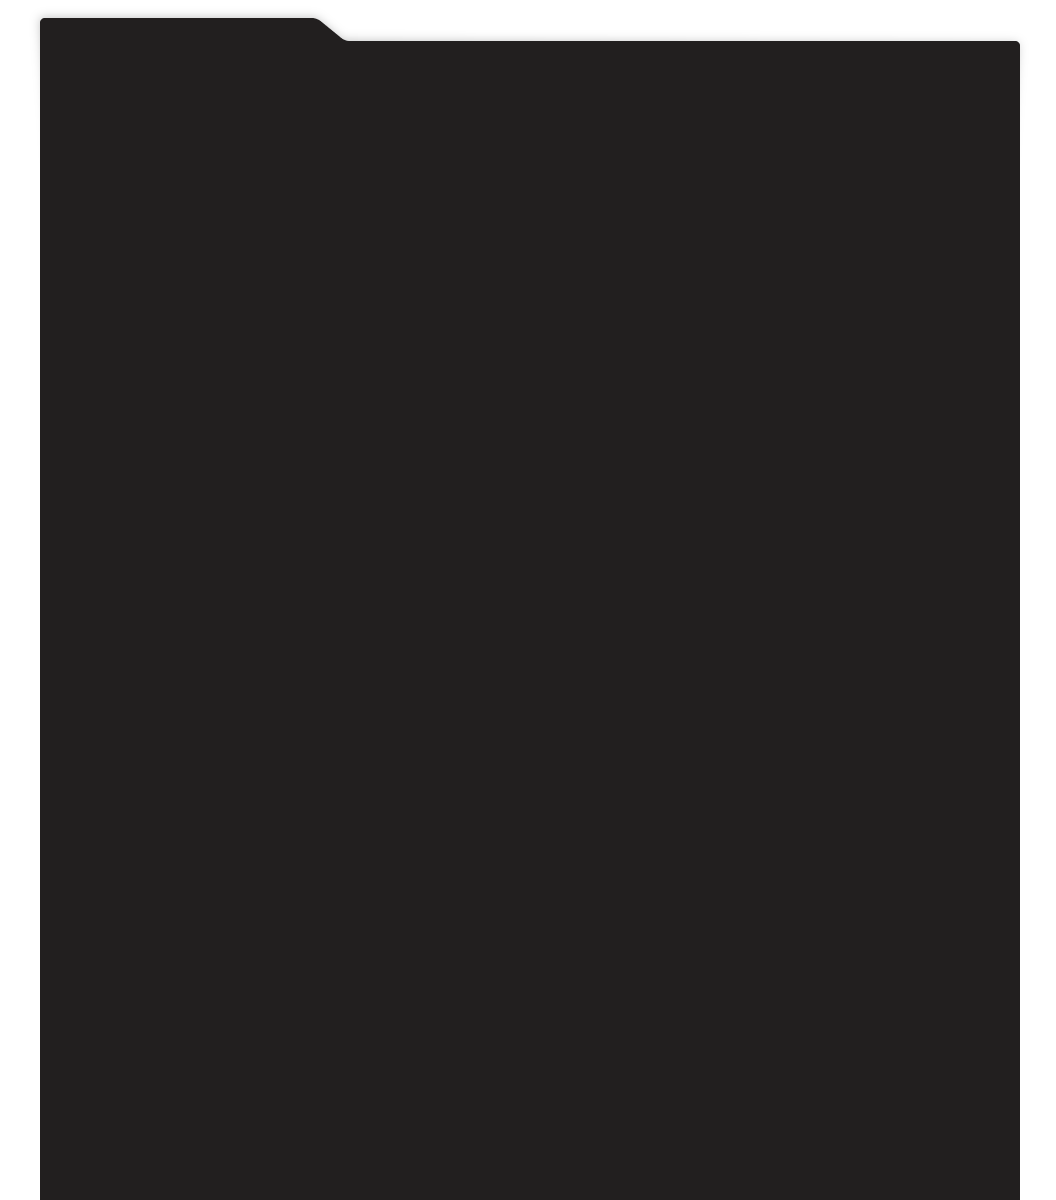
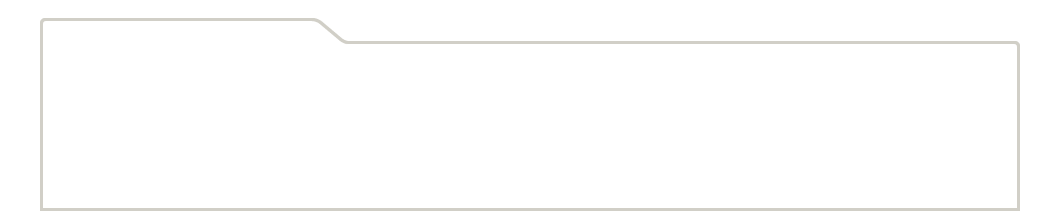
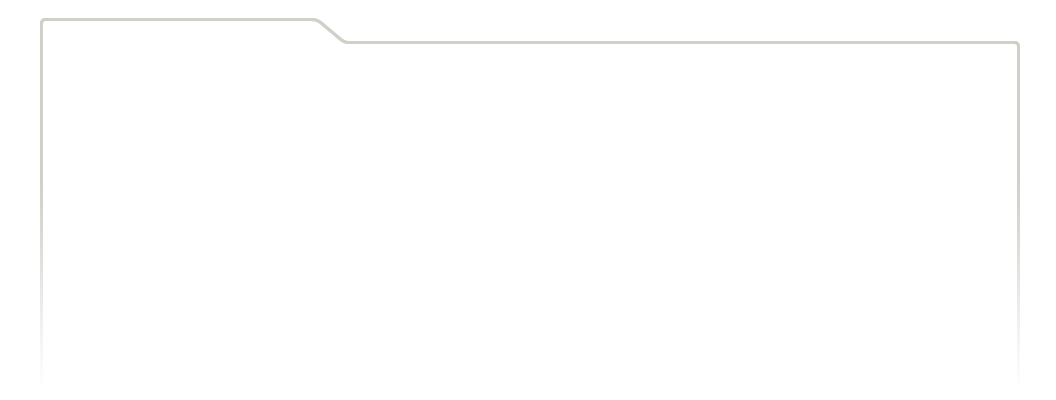
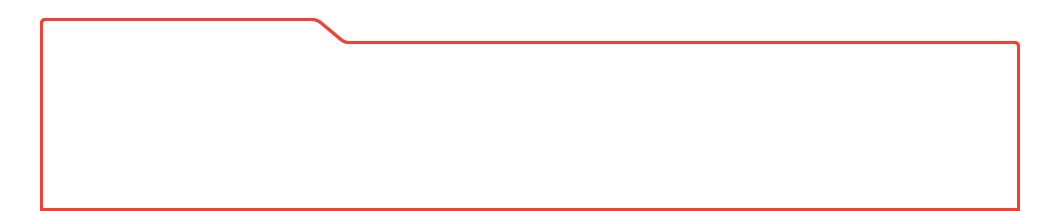
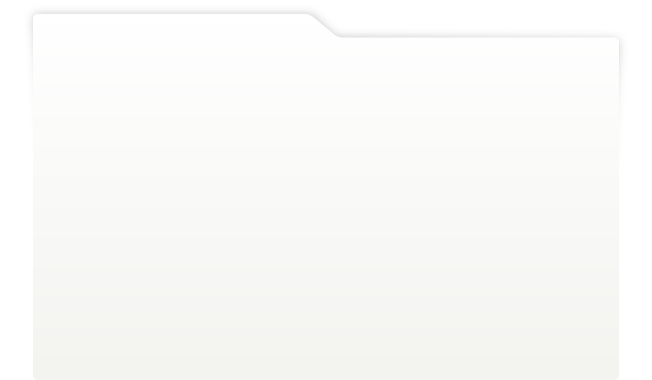
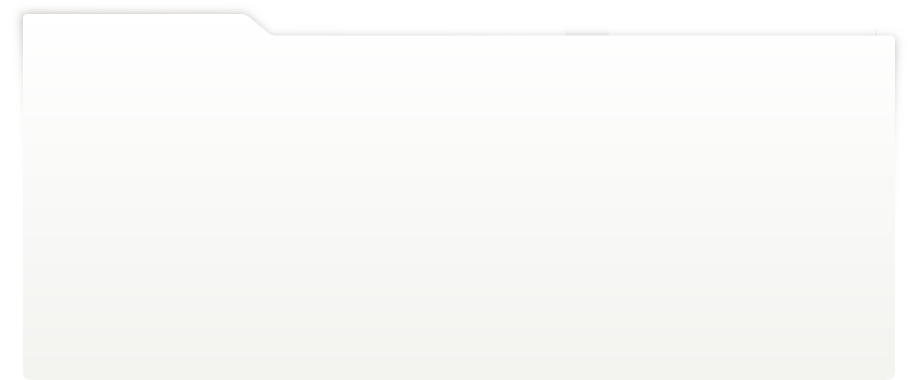
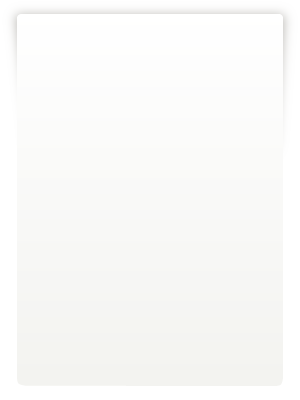
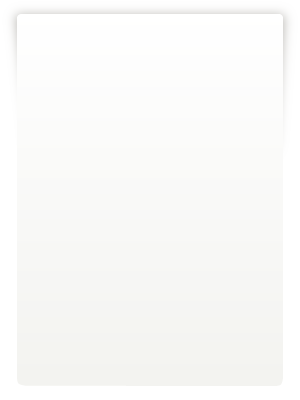
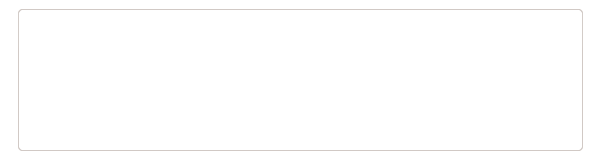
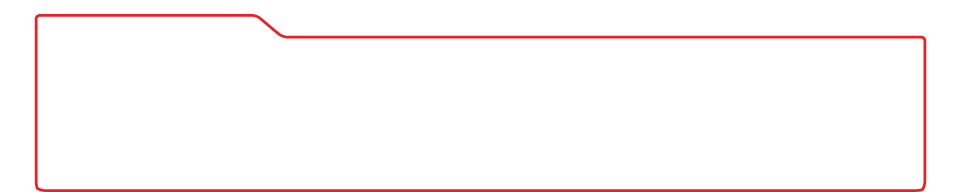
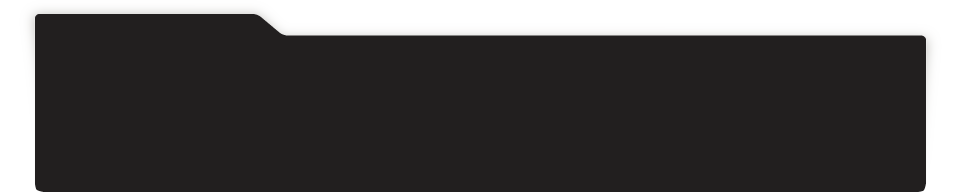
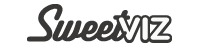
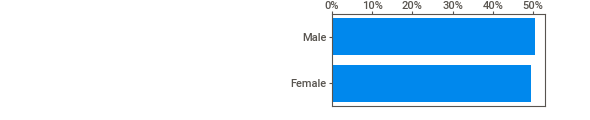
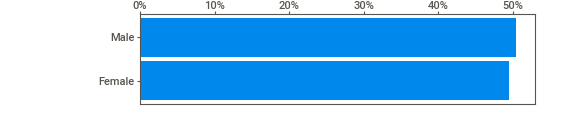
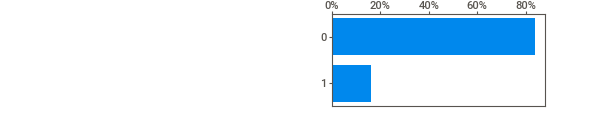
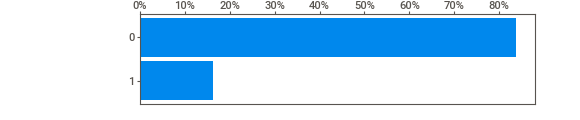
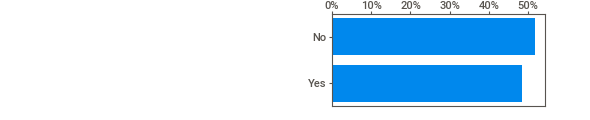
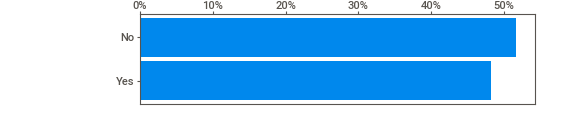
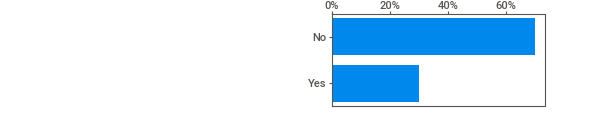
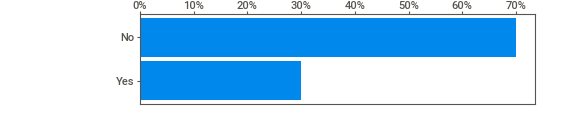
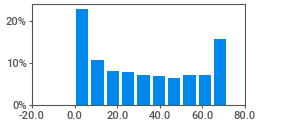
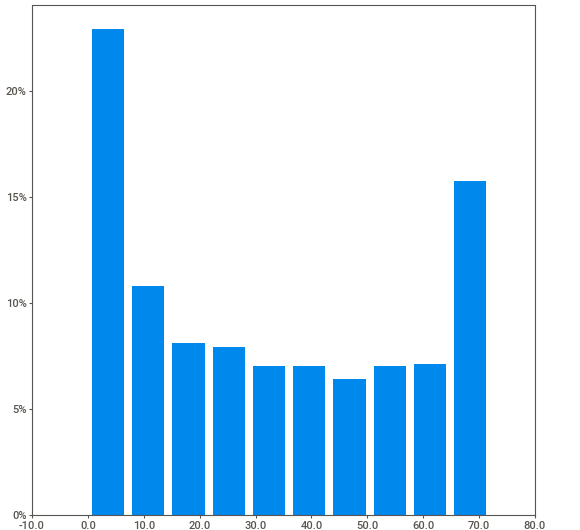
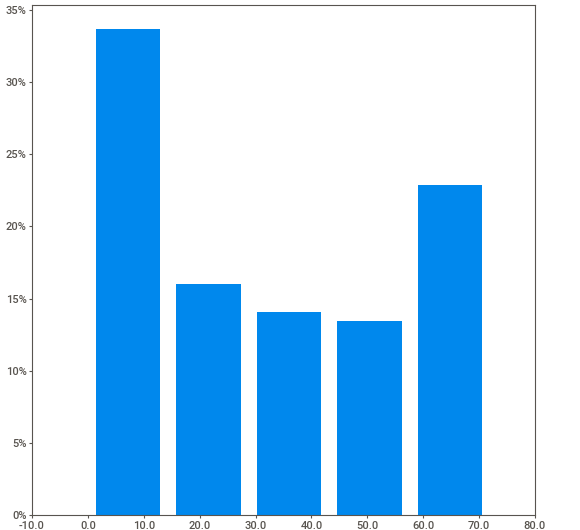
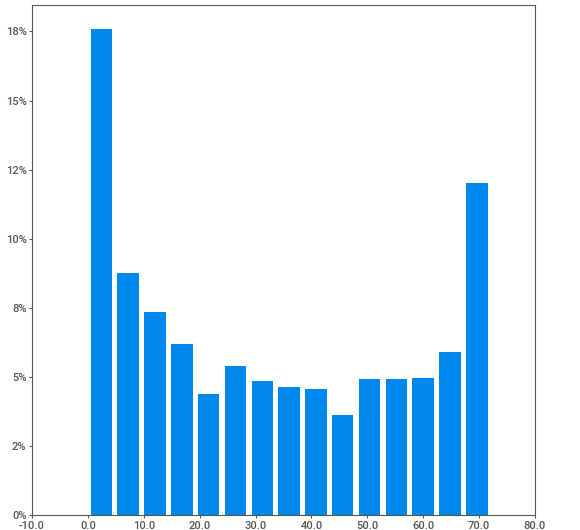
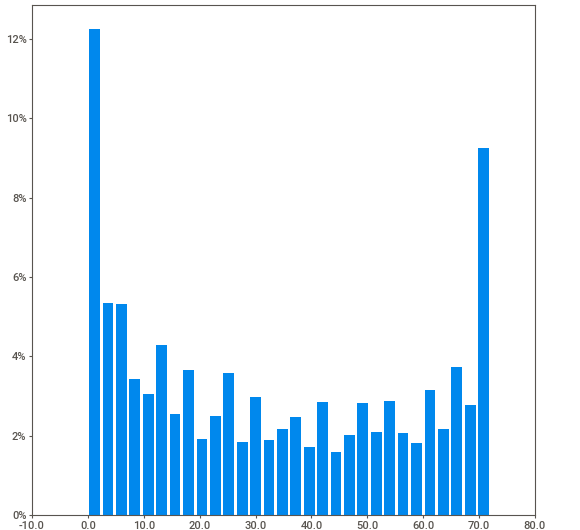
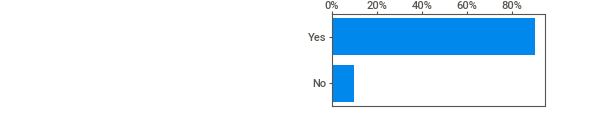
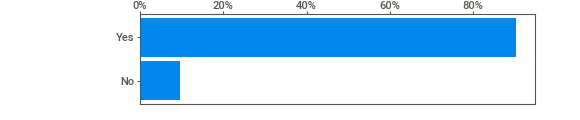
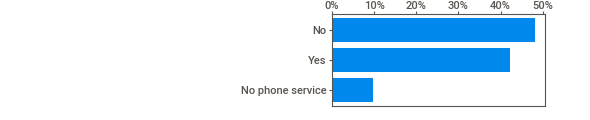
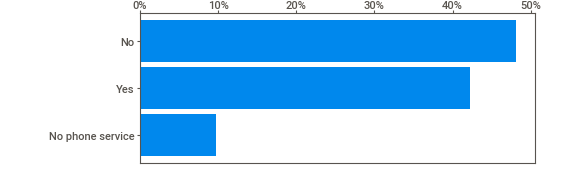
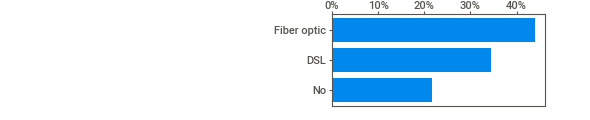
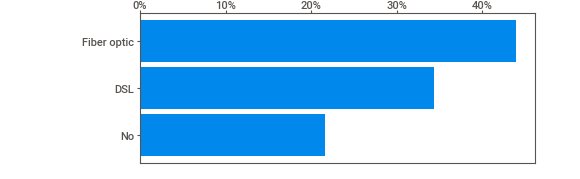
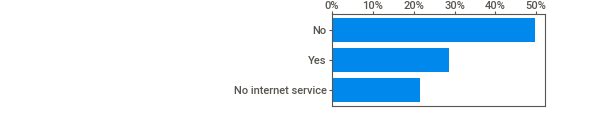
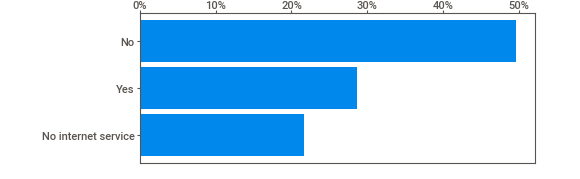
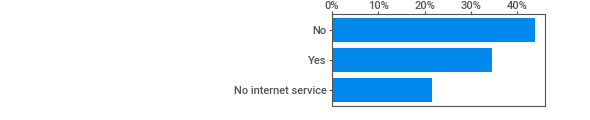
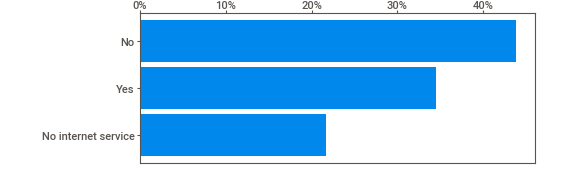
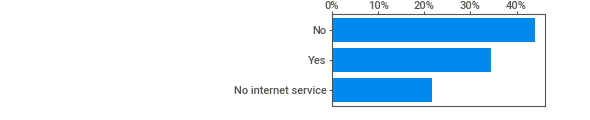
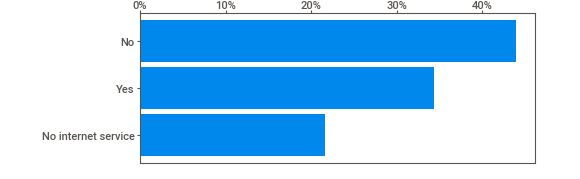
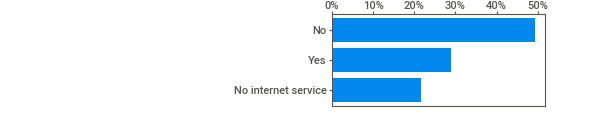
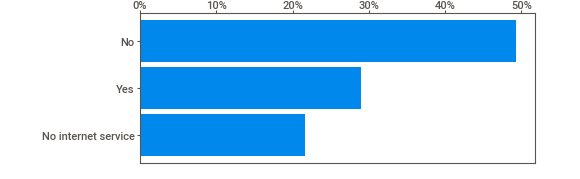
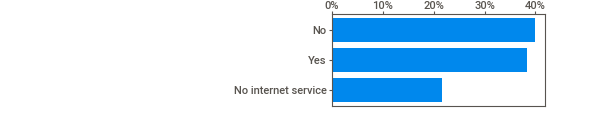
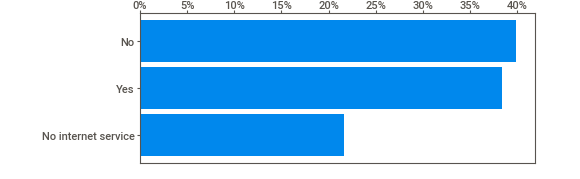
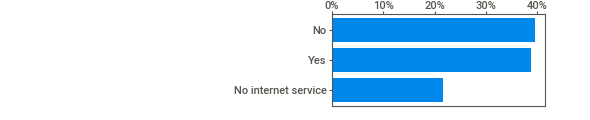
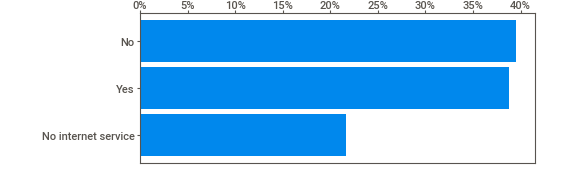
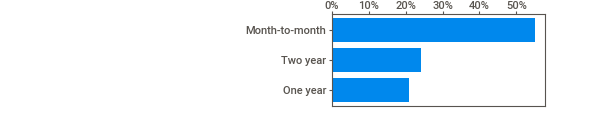
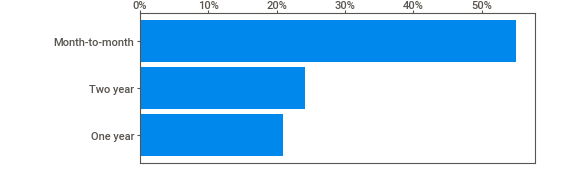
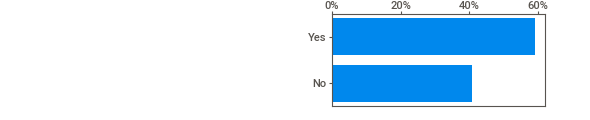
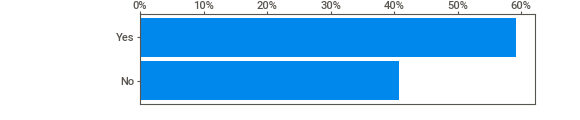
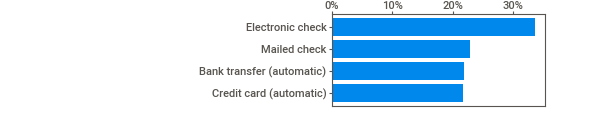
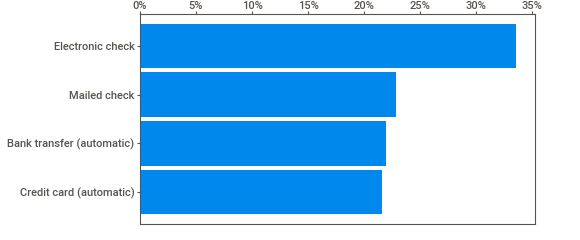
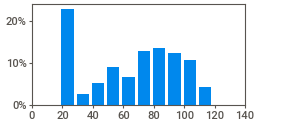
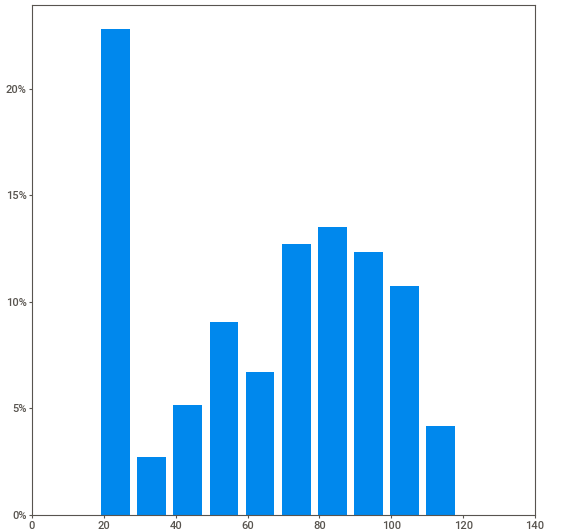
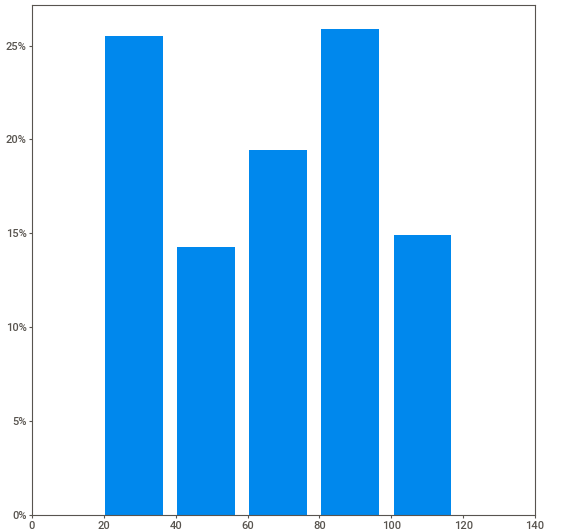
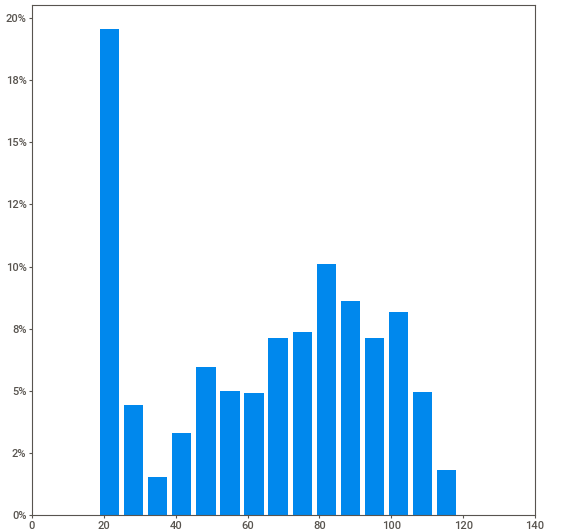
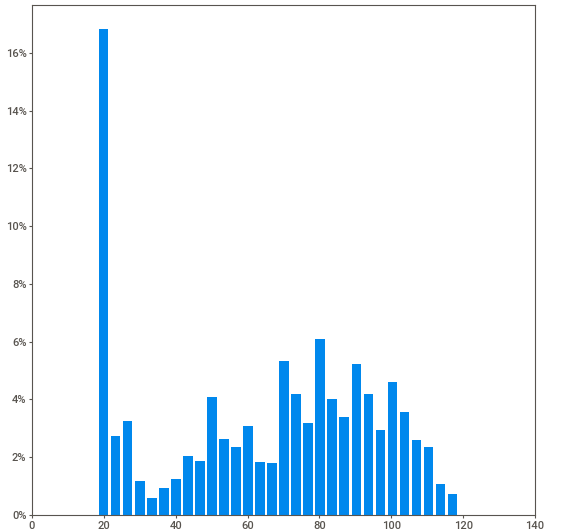
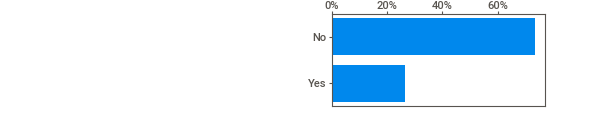
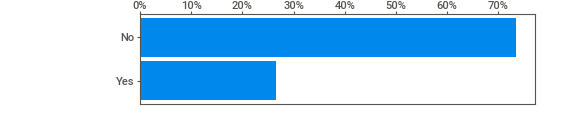
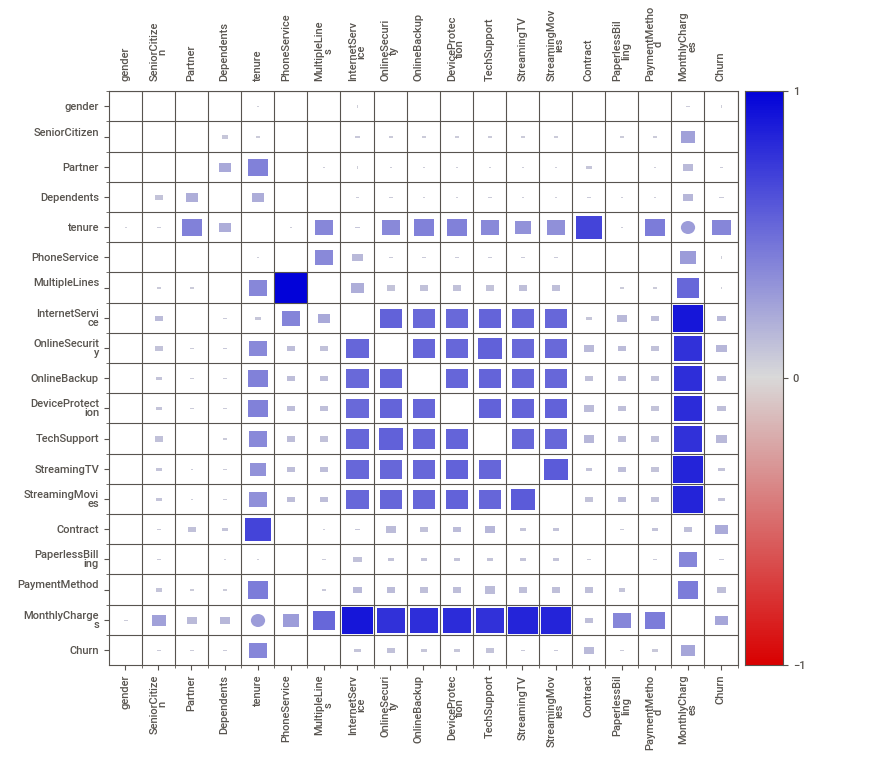
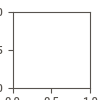

Report 'churn_report_sweetviz.html' was saved to storage.


In [139]:
# run this line if you want to generate the report in Notebook itself

sweet_report.show_notebook(filepath='churn_report_sweetviz.html', layout='widescreen', w=900)

# Lets plot a couple of plots for further understanding

#### The follwing dataset appears to have approximately 50.47% of Male respondents and approximately 49.52 % of Female respondents and is spilit exactly into half between the gender.

In [140]:
gender_percent = (df["gender"].value_counts()/df.shape[0])*100
print(gender_percent)

Male      50.47565
Female    49.52435
Name: gender, dtype: float64


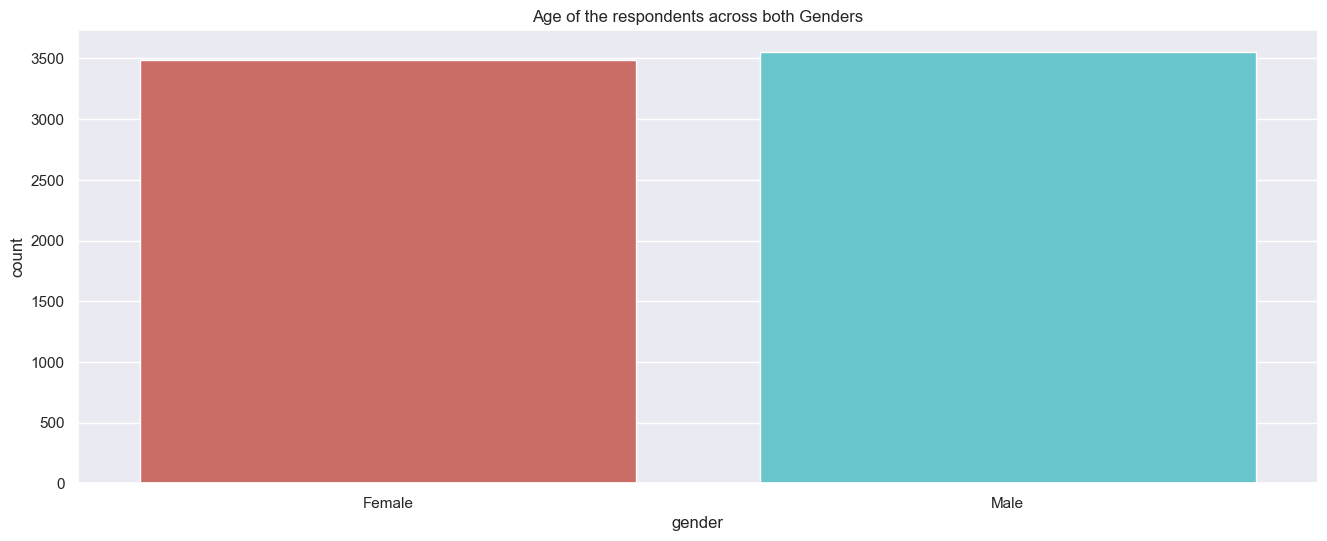

In [94]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="gender", data=df, palette="hls").set(title='Age of the respondents across both Genders')

#### From the below plor we can see that we have more number of respondents who are not maried / have no partner. 

#### The percentage is almost same compared to the respondents that are married / have a partner.

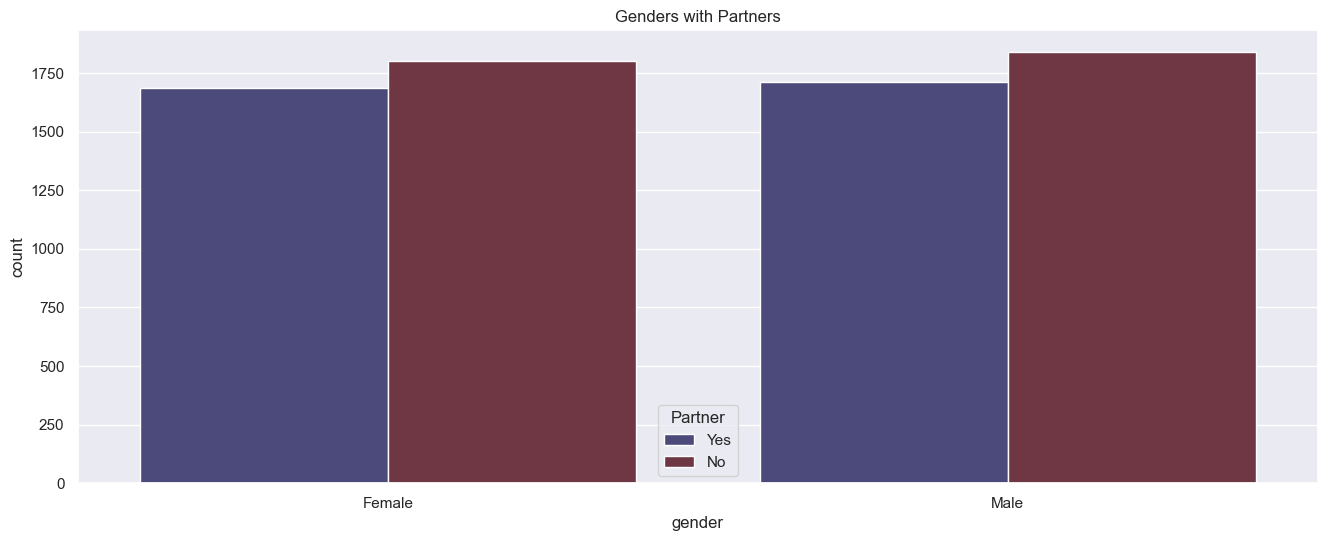

In [95]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="gender", data=df, hue="Partner", palette="icefire").set(title='Genders with Partners')

#### From this plot we can observ that there are customers who still do not have a telephone service in their area or at their homes.

#### Majority of customers who have telephone service seem to have a multiline network and the price / charges tend to increase as the number of lines increase.

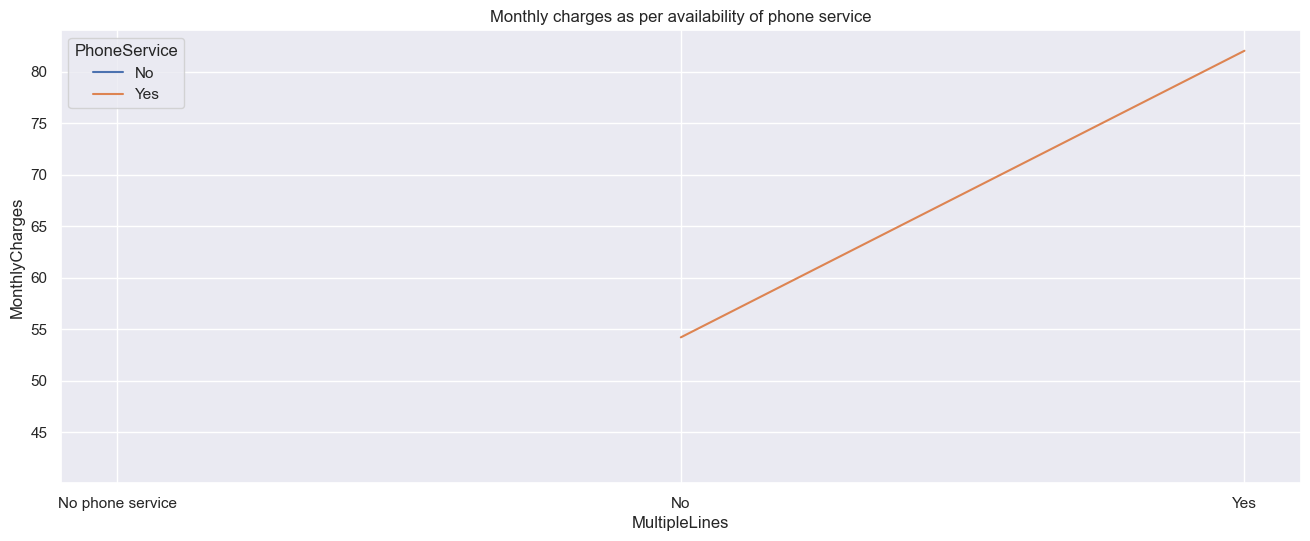

In [152]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="MultipleLines", y="MonthlyCharges", 
             hue="PhoneService", ci=None).set(title='Monthly charges as per availability of phone service')
plt.show()

#### Let's observe if there is any relationship between type of connection contract and payment methods.

#### We can see if a person goes with "month-to-month", they majorly prefer makiing payments through Electronic Check.

#### But if we observe, customers that have chosen contract for "one year" and "two year" seem to prefer using "Credit Card" or "Bank Transfer" which are automatic payment methods.

#### It makes sense as a person option for monthly contract, may or may not renew in the following month. Maybe they recently moved in, or stay at a location temperorarily. We can see there are more number of customers for "month-to-month" plan.

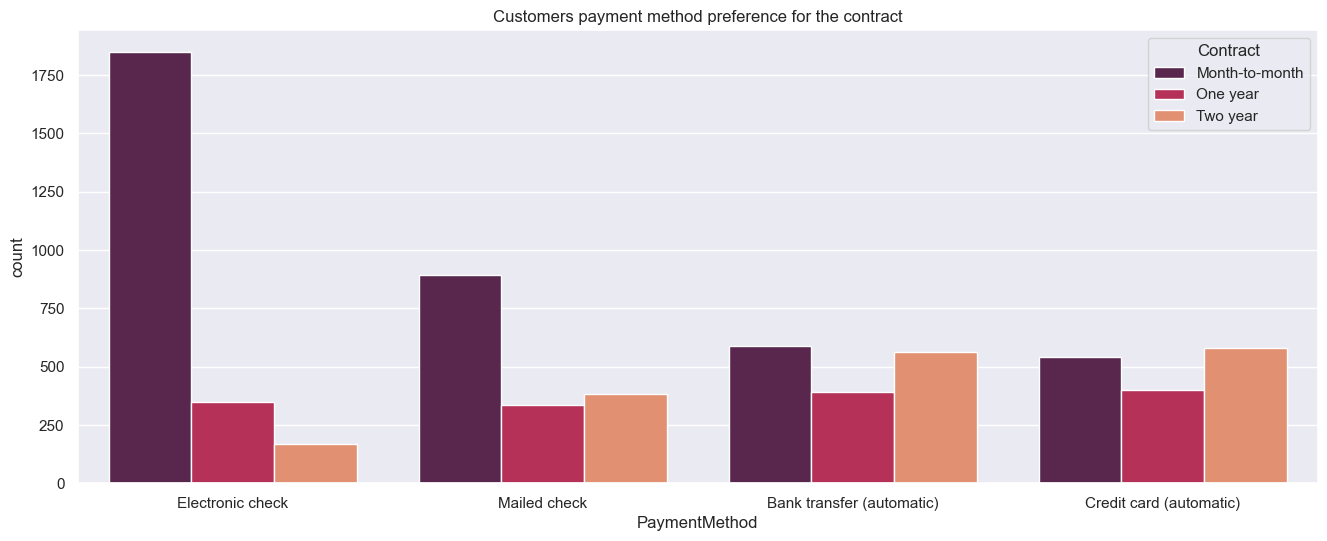

In [101]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="PaymentMethod", data=df, hue="Contract", palette="rocket").set(title='Customers payment method preference for the contract')

#### Let's see if there is any relationship between contract chosen and churn overall.

#### We can see as the contract is extended, they are likely to be long term customers. A person having little or no intention to carry forward plans would not opt for "one year" or "two year" contracts.

#### But the overall churn percenatge, it appears even if the customers have considered long term plans,  they have not necessarily continued further with the plan and comapany seems to lose on to the customers more than they are able to retain

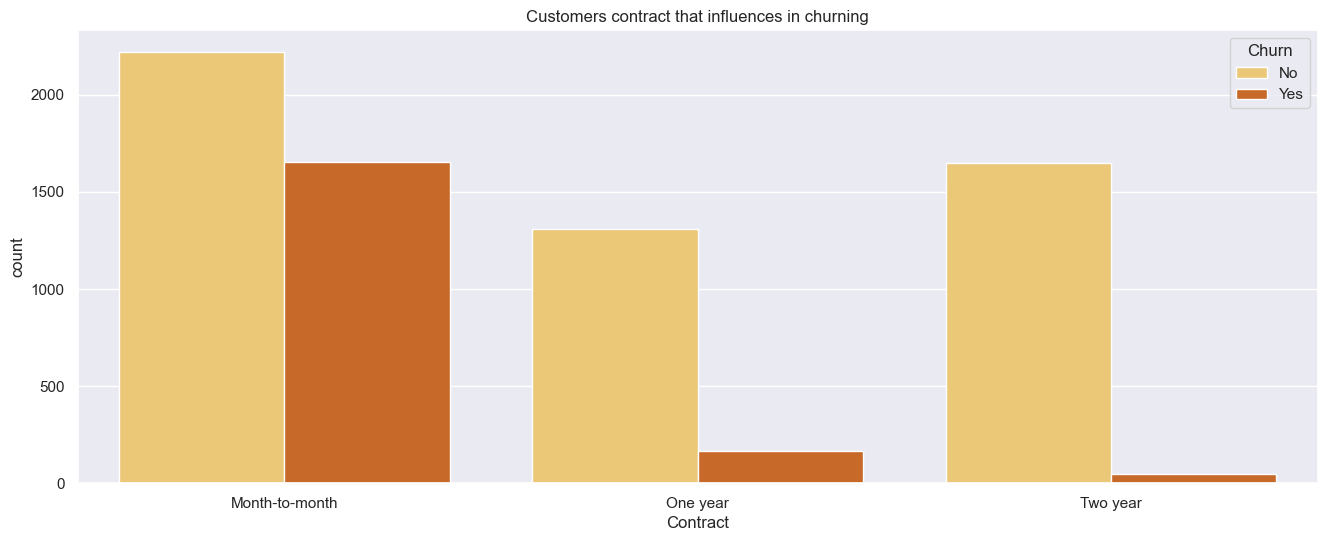

In [126]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette="YlOrBr").set(title='Customers contract that influences in churning')

#### From the below plot, we can see that "TechSupport" is very much important for this service.

#### We can see although there is "TechSupport", it is very much limited. Maybe the services are offer only for installation, or some major repairs.

#### But customers have discontinued because of lack of tech suppprt and teh company has to look into this issue to make sure every customer get's this.

#### We can also assume maybe the tech support is given to customers with long term plans and short term plans like "month-to-month" doesn't really have standard support.

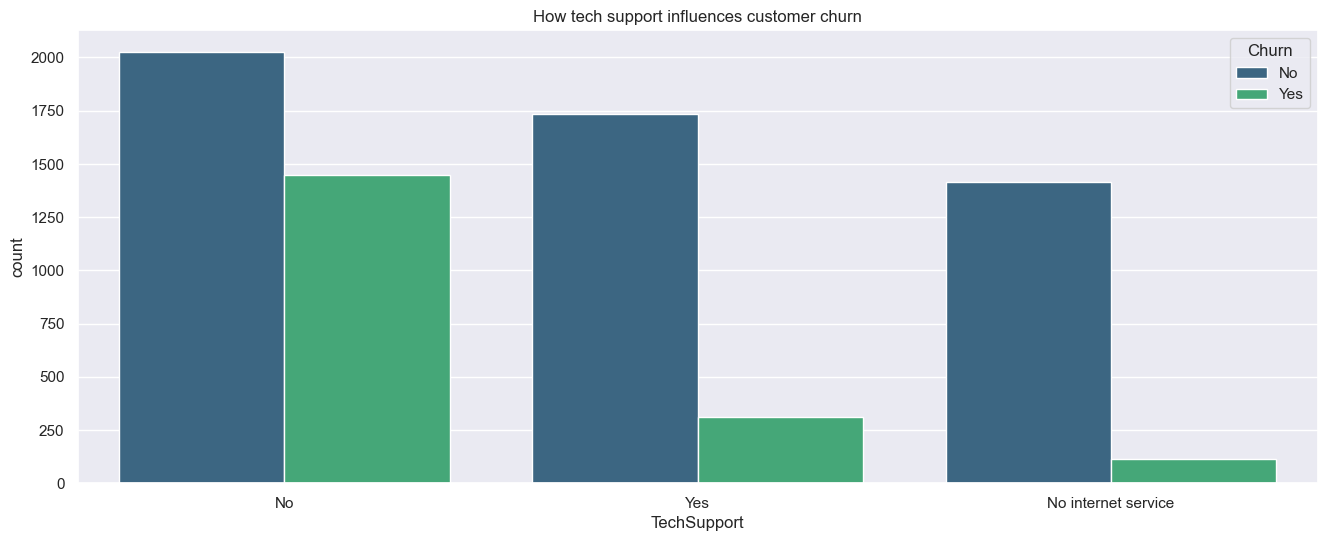

In [127]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="TechSupport", data=df, hue="Churn", palette="viridis").set(title='How tech support influences customer churn')

#### From the below plot, we can observe that majority of customers have opted for "Fiber Optic" cable network.

#### Fiber optics have been quite cheapers these days and almost all or most of the telecom or cable TV operators provide this service for the customers and it's an ideal choice for using Internet as well.

#### We can see there are a few customers who still use DSL and these are the older forms of internet connection where we need to have a landline of specific kind. 

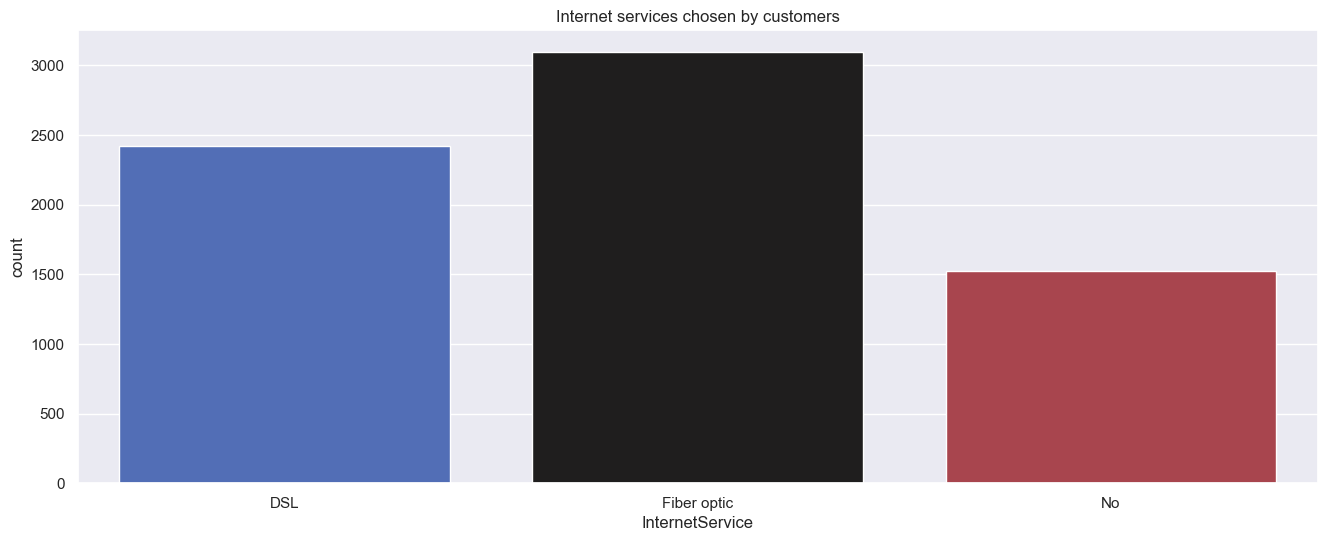

In [146]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="InternetService", data=df, palette="icefire").set(title='Internet services chosen by customers')

#### From the below 2 plots we can see that people opting for "Streaming TV" and "Streaming Movies" are likely going to be long term customers compared to the customers that are not inclined towards this service.

#### When we have easy acess to such pay services we tend to go for it as long as it's beneficial and the churn percentage is quite less if we compared it to the whole population.

#### Not all customers seem to think this is beneficial and hene may not opt for this service.


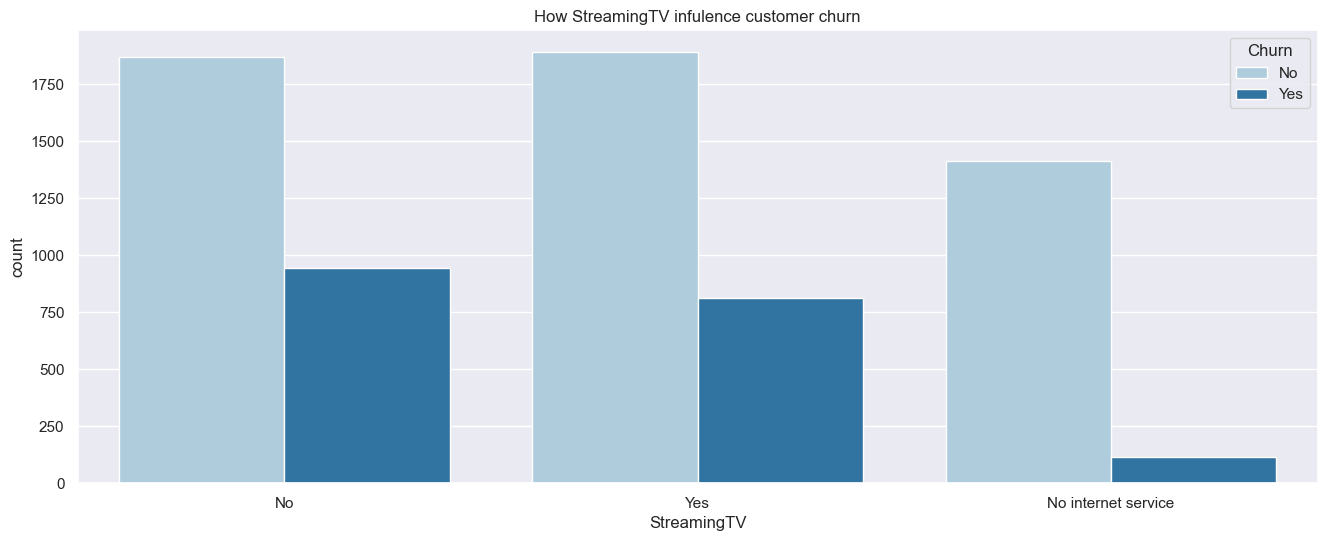

In [142]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="StreamingTV", data=df, hue="Churn", palette="Paired").set(title='How StreamingTV infulence customer churn')

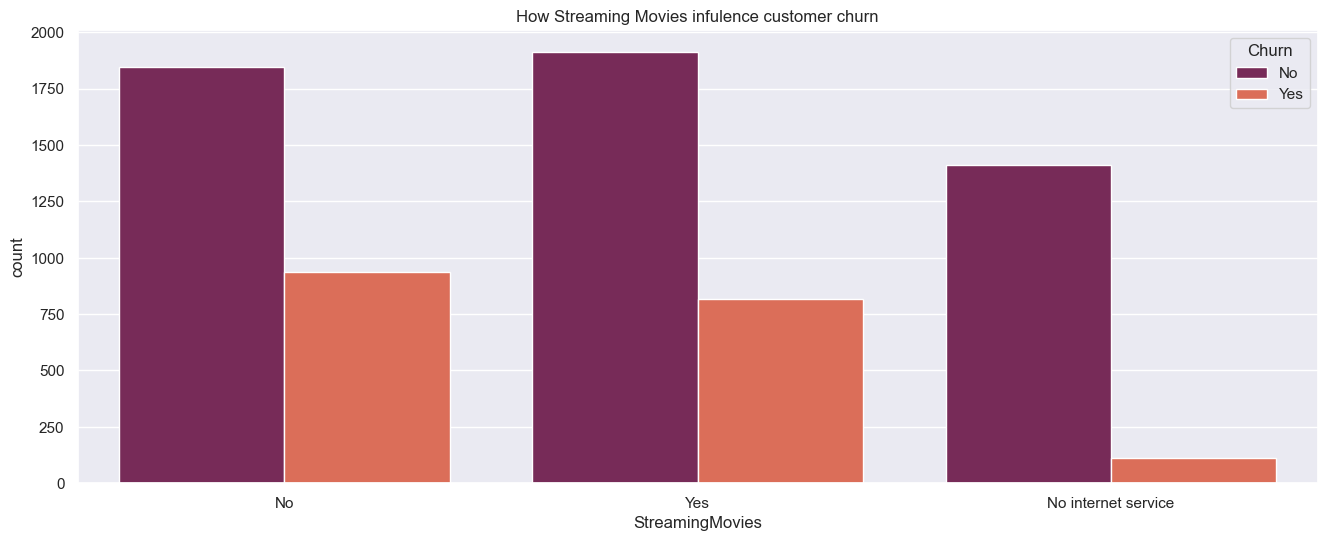

In [143]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="StreamingMovies", data=df, hue="Churn", palette="rocket").set(title='How Streaming Movies infulence customer churn')

#### From the below plot we can see that parerless billing is more for customers whoopt for "month-to-month" service. This makes sense as invoices are oftne generated over mails or on service account online.

#### But for customers that have chosen a "one-year" or "two-year" package, they seem to get more number of physical bills that the former service. Long term contarcts need to have proper trail of documents and this could be a prepaid service. 

#### Hence when a person makes one time payment they get some kind of receipt which is why paperless inthis case is very low.

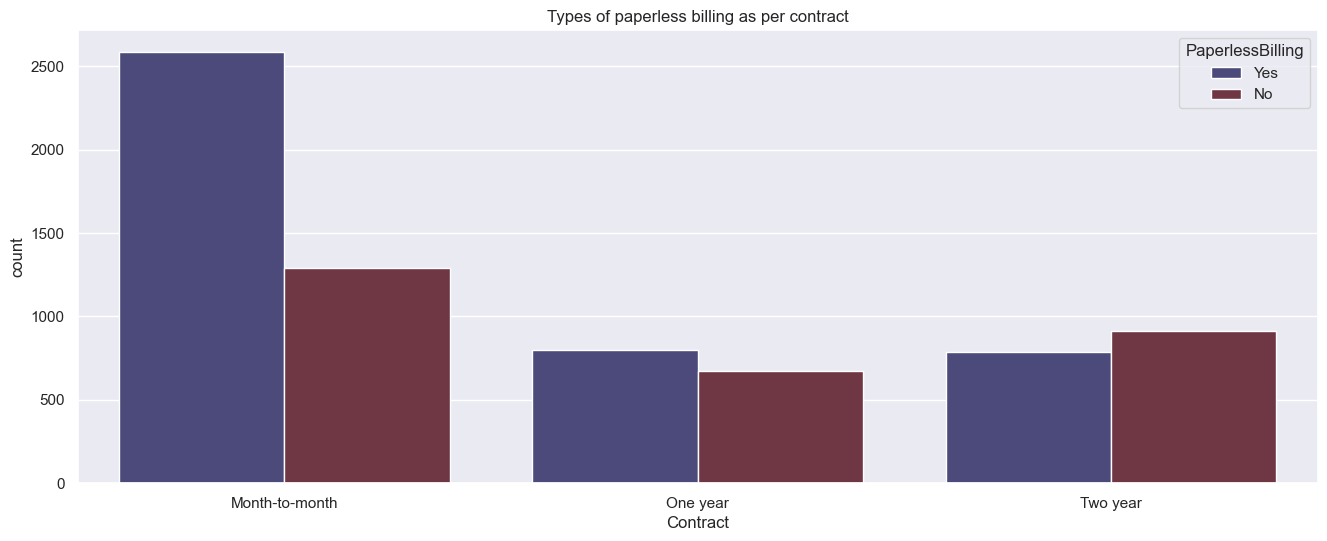

In [147]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Contract", data=df, hue= "PaperlessBilling", palette="icefire").set(title='Types of paperless billing as per contract')

#### Ffrom the below plot we can observe that monthly charges increase as and when the tenerue is increased.

#### The tenure is in months over here and it appears, down the line the prices have gradually increased thereby increasing  the internet consumption.

#### Also we can see that Female usage is higer than Male in this scenario as their monthly charges are relatively higher in majority of places comared to Males.

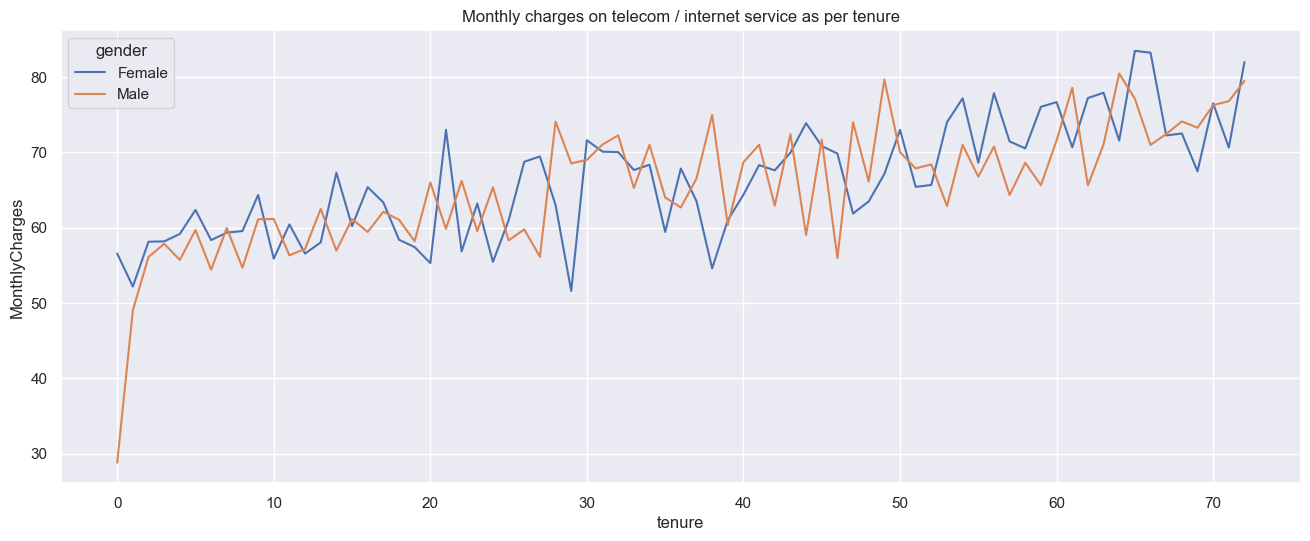

In [148]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="tenure", y="MonthlyCharges", 
             hue="gender", ci=None).set(title='Monthly charges on telecom / internet service as per tenure')
plt.show()

#### From the below plot we can see that telephone devices that are not protected have very little tech support compared to the devices that are protected.

#### Device protection could mean warranty or guarantee of replacement for devices. This could be free of cost to some exten under certain conditions or we may have to purchase waratee for certain amount.

#### We can observe there are certain people that do not get Tech Support as there is no interet service in that area.

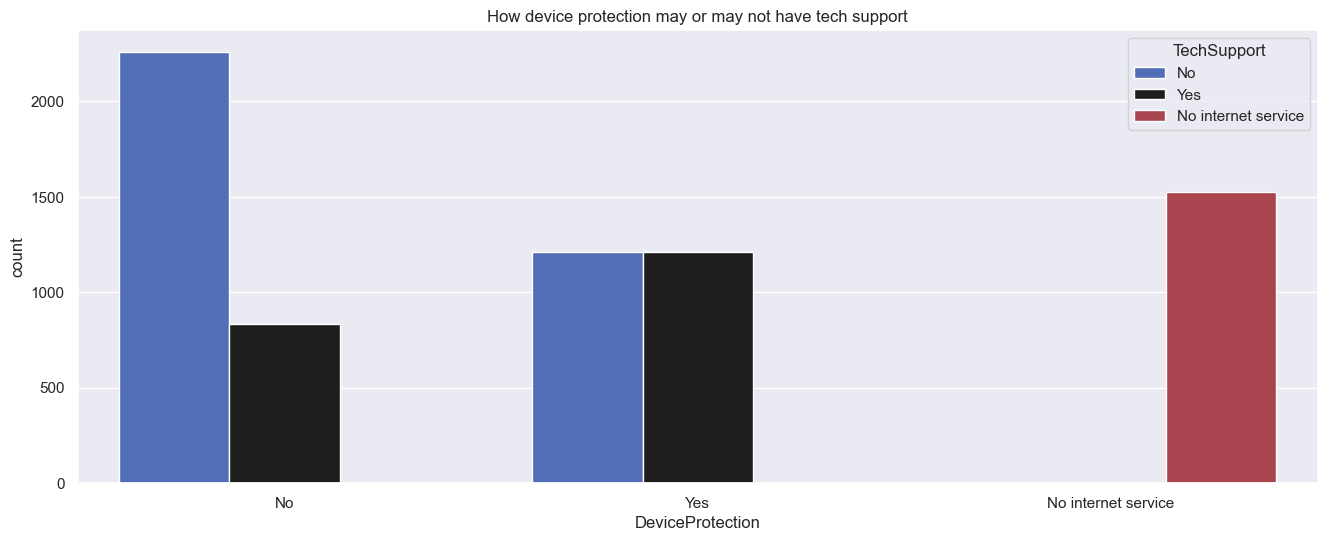

In [149]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="DeviceProtection", data=df, hue= "TechSupport", palette="icefire").set(title='How device protection may or may not have tech support')

# Preprocessing

### Encoding the dataset
##### The numerical columns we can see below are already given to us. But if they were not provided, I would have applied OrdinarEncoding technique as all the values are in orderly manner.

##### For the remaining non converted categorical features, I shall use LabelEncoder as they are not required to be in order. 

In [19]:
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [24]:
feat = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

### List of all the categorical columns have been passed to LabelEncoder as shown below

In [25]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [26]:
df_new2 = lab_enc.fit_transform(df["gender"])
df_new3 = lab_enc.fit_transform(df["Partner"])
df_new4 = lab_enc.fit_transform(df["Dependents"])
df_new5 = lab_enc.fit_transform(df["PhoneService"])
df_new6 = lab_enc.fit_transform(df["MultipleLines"])
df_new7 = lab_enc.fit_transform(df["InternetService"])
df_new8 = lab_enc.fit_transform(df["OnlineSecurity"])
df_new9 = lab_enc.fit_transform(df["OnlineBackup"])
df_new10 = lab_enc.fit_transform(df["DeviceProtection"])
df_new11 = lab_enc.fit_transform(df["TechSupport"])
df_new12 = lab_enc.fit_transform(df["StreamingTV"])
df_new13 = lab_enc.fit_transform(df["StreamingMovies"])
df_new14 = lab_enc.fit_transform(df["Contract"])
df_new15 = lab_enc.fit_transform(df["PaperlessBilling"])
df_new16 = lab_enc.fit_transform(df["PaymentMethod"])
df_new18 = lab_enc.fit_transform(df["Churn"])

In [27]:
df["gender"] = df_new2
df["Partner"] = df_new3
df["Dependents"] = df_new4
df["PhoneService"] = df_new5
df["MultipleLines"] = df_new6
df["InternetService"] = df_new7
df["OnlineSecurity"] = df_new8
df["OnlineBackup"] = df_new9
df["DeviceProtection"] = df_new10
df["TechSupport"] = df_new11
df["StreamingTV"] = df_new12
df["StreamingMovies"] = df_new13
df["Contract"] = df_new14
df["PaperlessBilling"] = df_new15
df["PaymentMethod"] = df_new16
df["Churn"] = df_new18

### We can see now the entire dataset is converted to numerical values

In [28]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
0                 1              2           29.85      0  
1                 0              3           56.95      0  
2                 1              3           53.85      1  
3                 0              0           42.30      0  
4                 1              2           70.70      1

# Distribution of all the columns in the dataset


### Since all the columns are actually categorical in nature, there is no need to deduce any understanding from distribution as it doesn't apply.

### Although we have pincodes as Int, these are also not the typical continous variables and hence distribution is not considered for this as well.

### This is how I would check the distribition and then proceed to remove outliers uisng either IQR or Z-score method to reduces skewness if the dataset was continous features

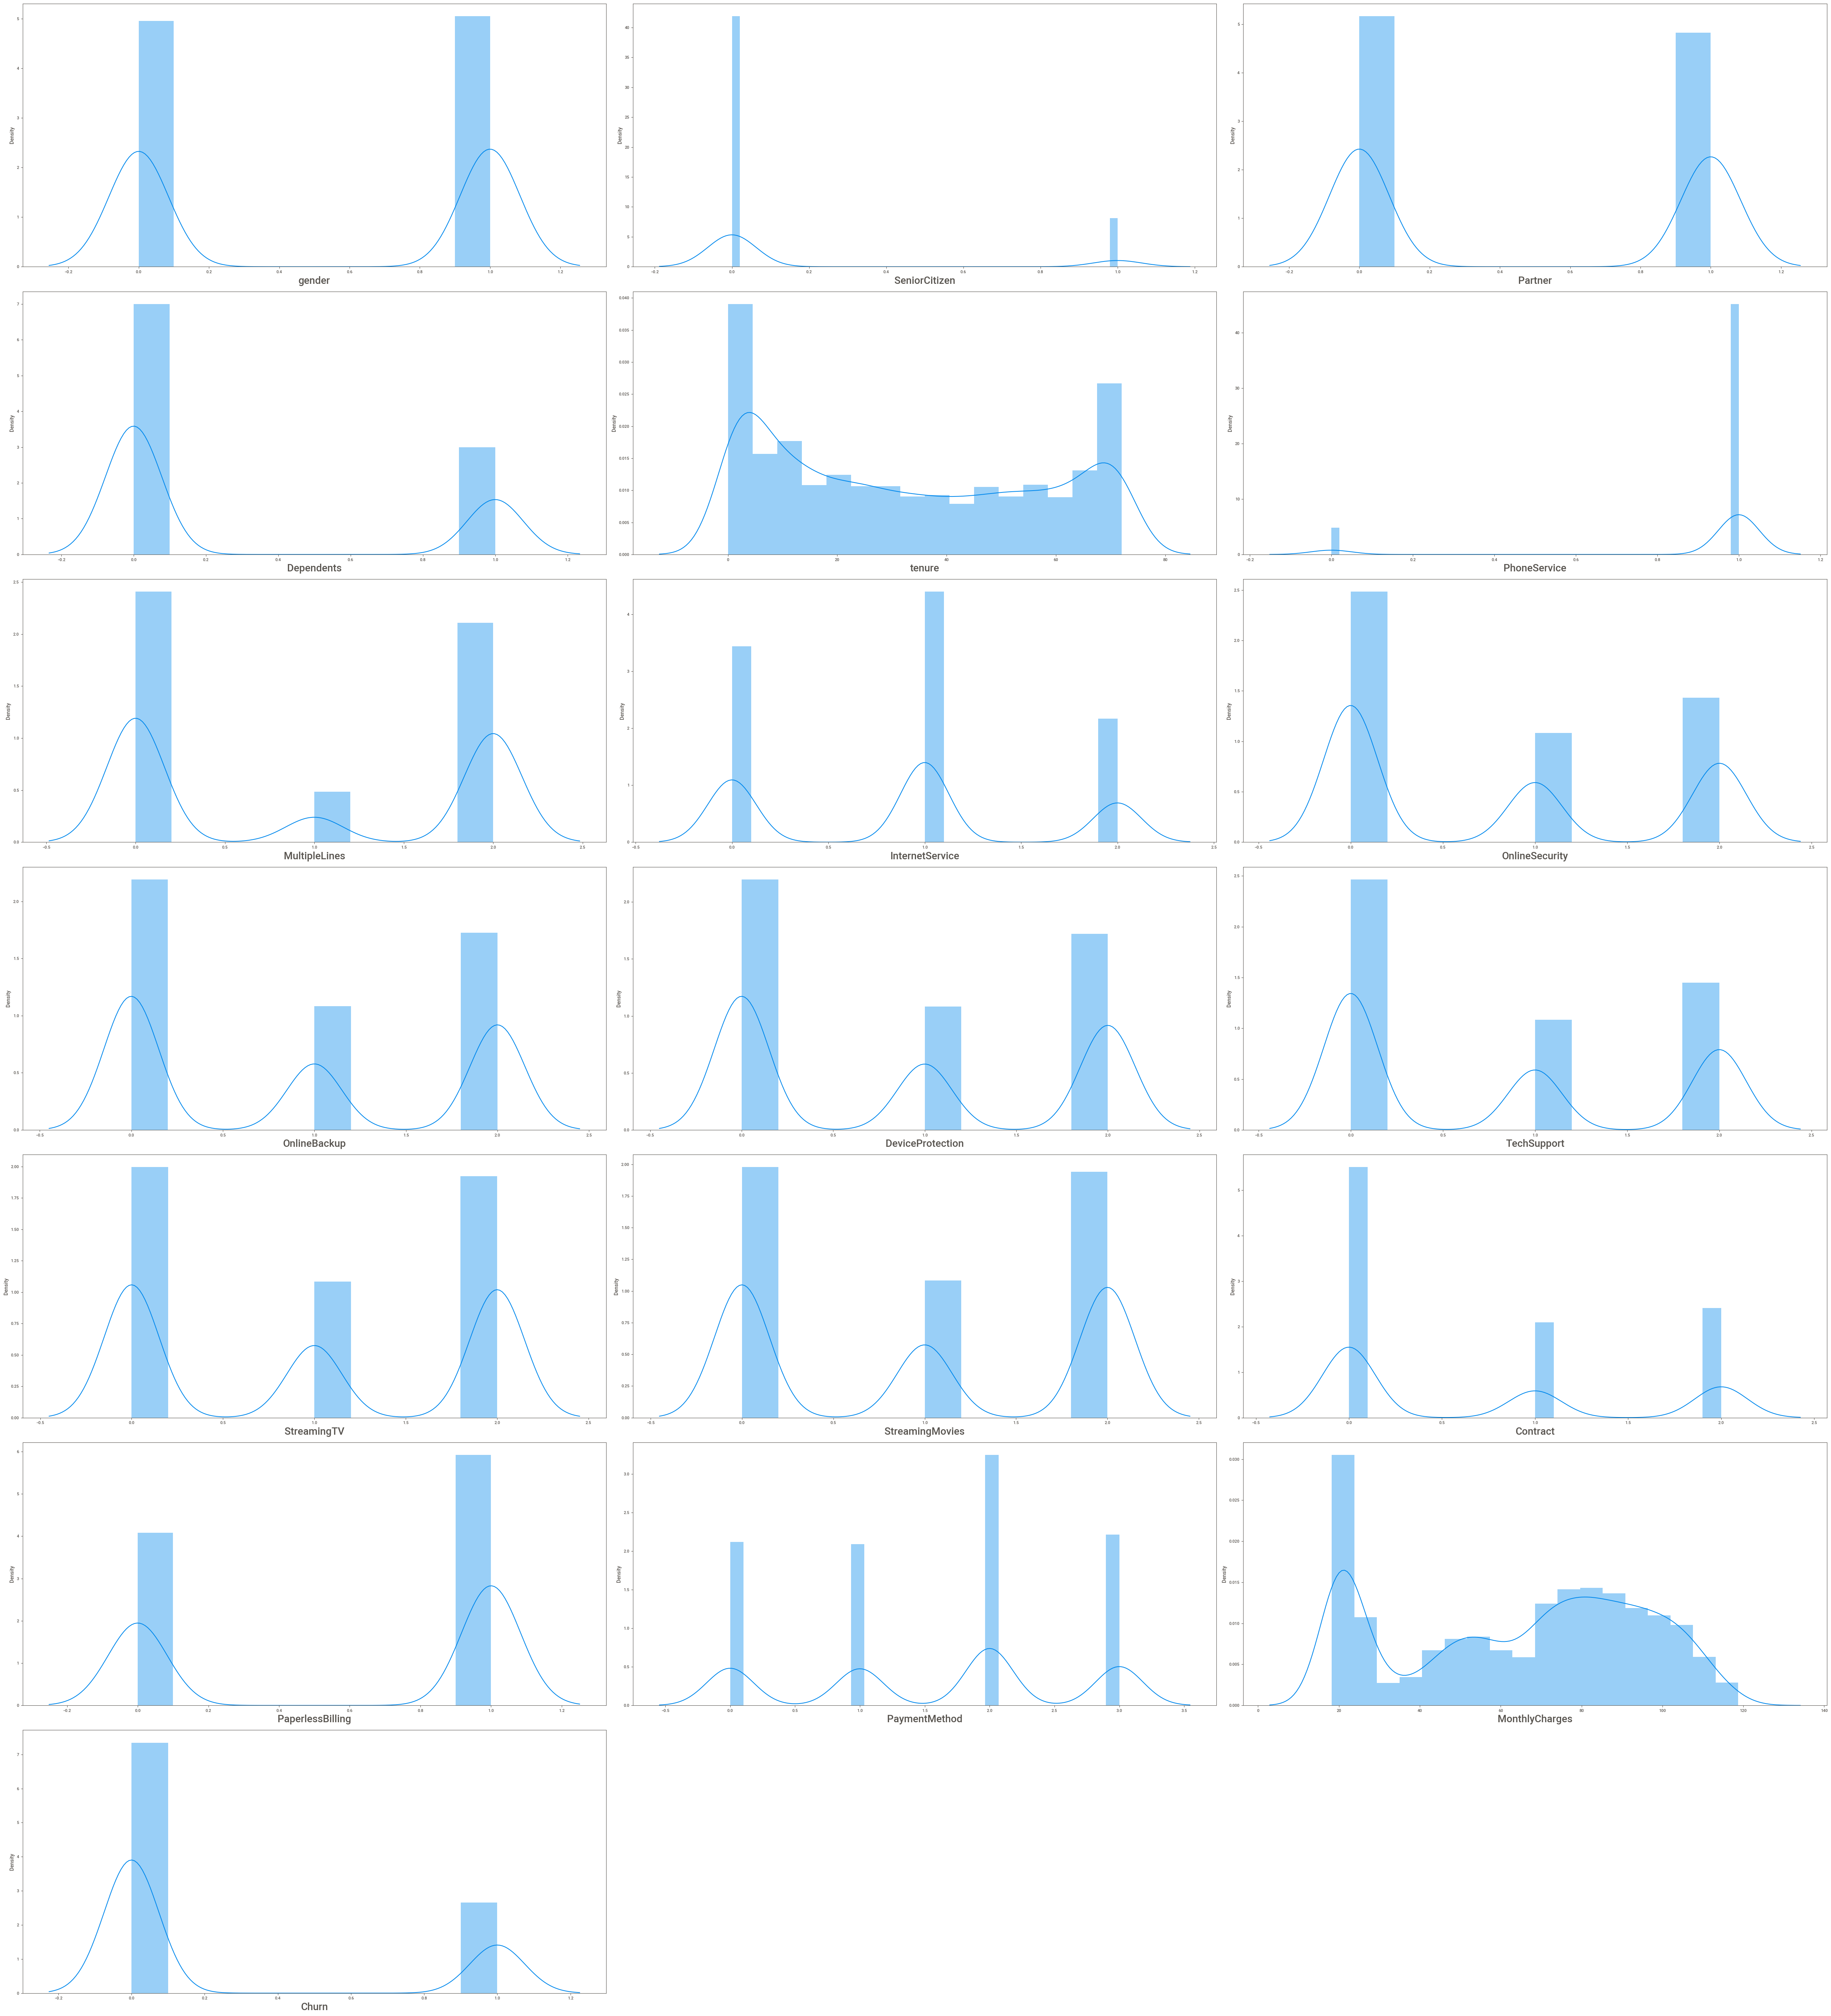

In [30]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=19:
        ax = plt.subplot(7,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### I have considered columns 'DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate' and 'PercentSalaryHike' as these are the only continous data columns.

### The remaining numerical columns are all in general categorical in nature and applying this method makes no sense.

In [31]:
from scipy.stats import zscore

z_score = zscore(df[['tenure','MonthlyCharges']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.906432          0.904444     0.797104     0.985376   
std        0.880162          0.879949     0.861551     0.885002   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges        Churn  
count     7043.000000  7043.000000  
mean        64.761692     0.265370  
std         30.090047     0.441561  
min         18.250000     0.000000  
25%         35.500000     0.000000  
50%         70.350000     0.000000  
75%         89.850000     1.000000  
max        118.750000     1.000000

### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case the data appears to be normally distributed hence no values are reduced even after applying z-score

In [32]:
# Percentage data loss:

loss_percent = (7043-7043)/7043*100
print(loss_percent)

0.0


## Correlation of the features with the dependent variable "W"

#### The "MonthlyIncome" seems to have a higher correlation

In [33]:

corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


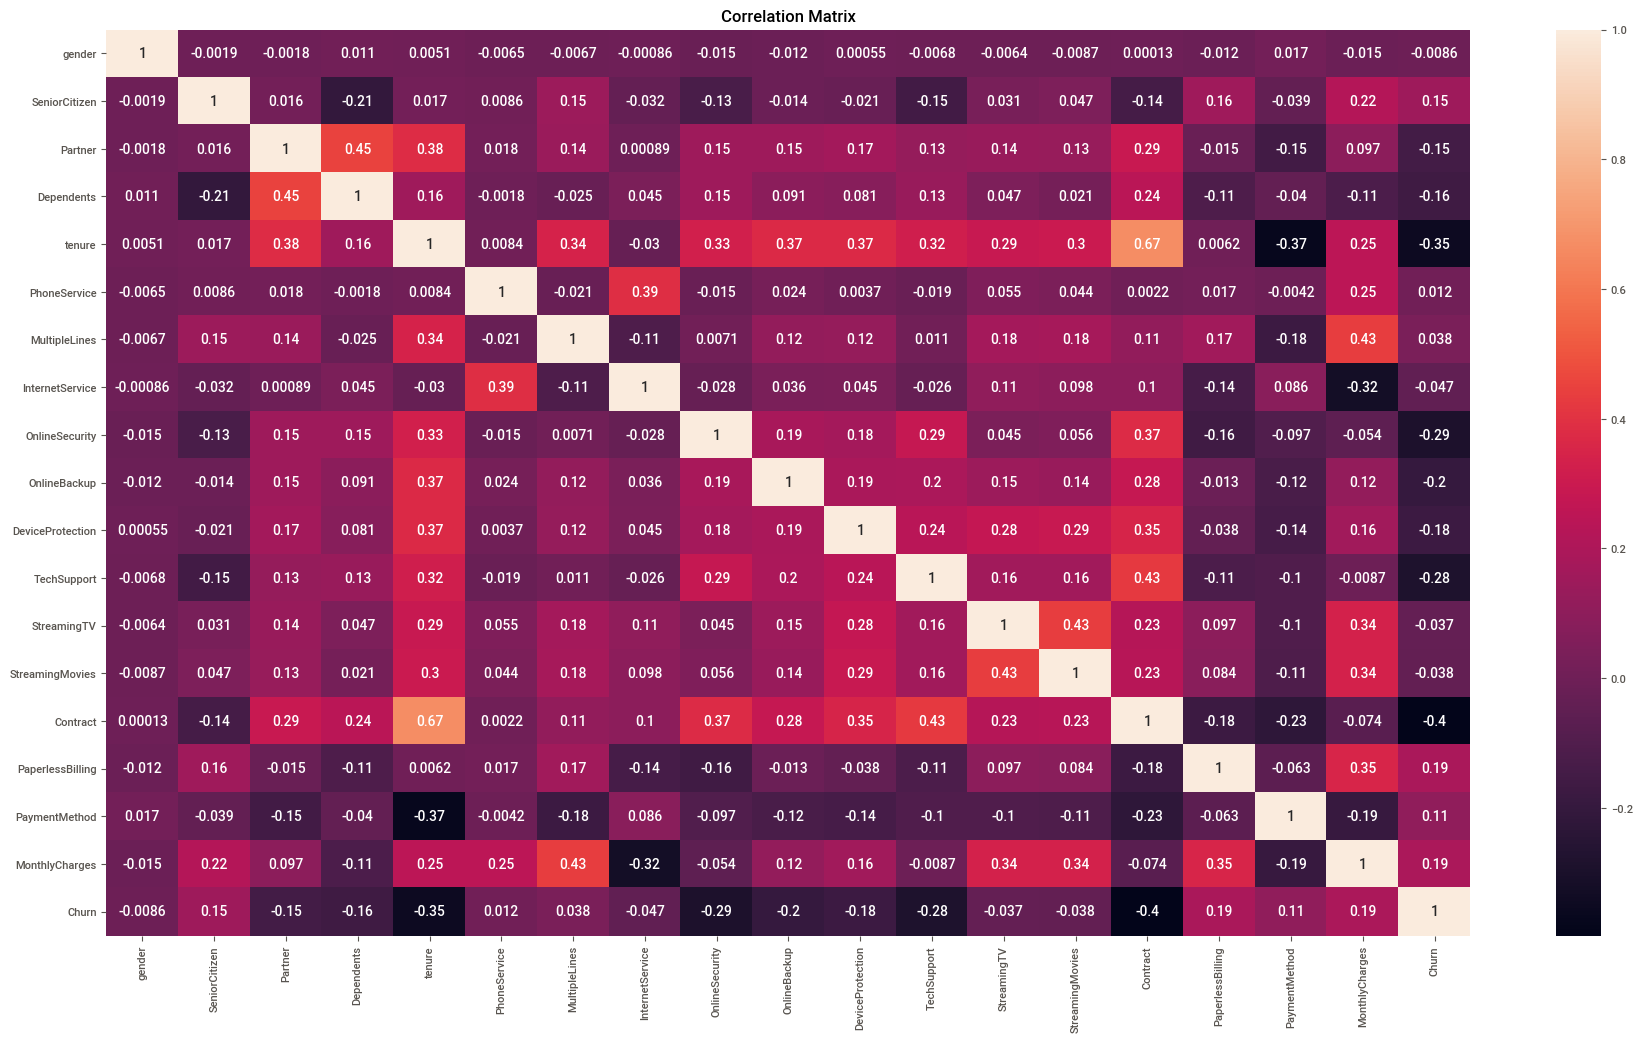

In [34]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [35]:
x = df.drop(columns = ["Churn"], axis=1)
y = df["Churn"]

### Check for skewness of data

In [36]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
dtype: float64

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 


#### I have not used Variation Inflation Factor and haven't checked for skewness

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears the numerical column "MonthlyIncome" has high VIF, hence i will drop the column

##### [ by dropping this coulmn the model imporved well]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif          Features
0   1.001684            gender
1   1.149639     SeniorCitizen
2   1.460856           Partner
3   1.382106        Dependents
4   2.754468            tenure
5   1.622282      PhoneService
6   1.391652     MultipleLines
7   1.825876   InternetService
8   1.247696    OnlineSecurity
9   1.185932      OnlineBackup
10  1.280152  DeviceProtection
11  1.303573       TechSupport
12  1.443671       StreamingTV
13  1.442276   StreamingMovies
14  2.459201          Contract
15  1.202918  PaperlessBilling
16  1.180664     PaymentMethod
17  2.733024    MonthlyCharges

# Check if the dataset is over sampling or under sampling

In [39]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset.

In [40]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [41]:
y_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in text dataset

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 4 ML models in this scenario

### 1) DecisionTreeClassifier 

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7845410628019324
[[1233  344]
 [ 325 1203]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1577
           1       0.78      0.79      0.78      1528

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



### 2) XGBClassifier

In [44]:
from xgboost import XGBClassifier
xgb_reg = XGBClassifier(eval_metric='mlogloss')
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8380032206119162
[[1289  288]
 [ 215 1313]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1577
           1       0.82      0.86      0.84      1528

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



### 3) HistGradientBoostingClassifier

In [45]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_reg = HistGradientBoostingClassifier()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8360708534621578
[[1283  294]
 [ 215 1313]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1577
           1       0.82      0.86      0.84      1528

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



### 4) ExtraTreesClassifier

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8251207729468599
[[1302  275]
 [ 268 1260]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1577
           1       0.82      0.82      0.82      1528

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



### 5) RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8347826086956521
[[1303  274]
 [ 239 1289]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1577
           1       0.82      0.84      0.83      1528

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



### 6) GradientBoostingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8186795491143317
[[1247  330]
 [ 233 1295]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1577
           1       0.80      0.85      0.82      1528

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# Cross validation to check if its overfitting

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTreeClasifier model is:", scr.mean())

Cross Validation score of DecisionTreeClasifier model is: 0.7207139371894961


In [54]:
scr = cross_val_score(xgb_reg, x, y, cv=5)
print("Cross Validation score of XGBClassifier model is:", scr.mean())

Cross Validation score of XGBClassifier model is: 0.7831894396412673


In [55]:
scr = cross_val_score(hist_reg, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.7938399251564617


In [83]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.7712631661720111


In [58]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.7875912357248855


In [59]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8023579142202723


# ROC AUC score for all the algorithms

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [79]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.7845839821119694

In [80]:
#ROC AUC score for XGBClassifier

roc_auc_score(y_test, xgb_reg.predict(x_test))

0.8383339779619994

In [81]:
#ROC AUC score for HistGradientBoostingClassifier

roc_auc_score(y_test, hist_reg.predict(x_test))

0.8364316317349862

In [82]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.8251127961833558

In [84]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8349193826836693

In [85]:
#ROC AUC score for GradientBoostingClassifier

roc_auc_score(y_test, gb_class.predict(x_test))

0.8191275020168853

# ROC AUC score plots

#### We can see the ROC curve shows more for ExtraTreesClassifier. 

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

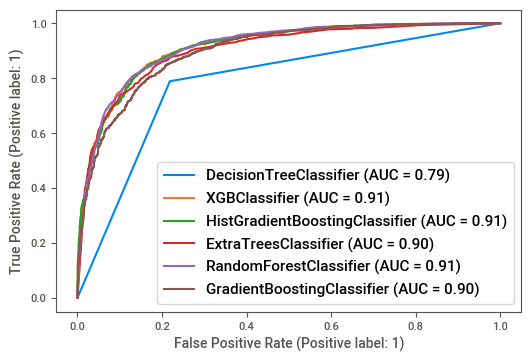

In [87]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(xgb_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(hist_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(gb_class, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Selecting the best ML model for this dataset

### From the above algorithms HistGradientBoostingClassifier, ExtraTreeClassifier and DecisionTreeClasifier have lowest difference between the accuracy score and cross validation score and are all same.

### XGBClassifier has difference value more than other algorothms hence will not consider this

### I have used HistGradientBoostingClassifier in this scenario.

### Also I could not consider LogisticRegression as we have more than 2 classes in target columns


| Sr.No. | Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeClassifier | 0.784541062801932 | 0.720713937189496 | 0.0638271256124361 |
| 2 | XGBClassifier | 0.838003220611916 | 0.783189439641267 | 0.054813780970649 |
| 3 | HistGradientBoostingClassifier | 0.836070853462157 | 0.793839925156461 | 0.0422309283056961 |
| 4 | ExtraTreesClassifier | 0.825120772946859 | 0.7712631661720111 | 0.0538576067748481 |
| 5 | RandomForestClassifier | 0.834782608695652 | 0.787591235724885 | 0.047191372970767 |
| 6 | GradientBoostingClassifier | 0.818679549114331 | 0.802357914220272 | 0.016321634894059 |



# Hyper Parameter Tuning

### Let us try to tune the proposed model (GradientBoostingClassifier) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [61]:
parameters = {"loss":["deviance", "exponential"],
              "criterion":["friedman_mse", "mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "n_estimators":[50, 70, 90, 100, 130, 150],
              "random_state":[50, 70, 90, 100, 130, 150],
              "tol":[1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
              }

### RandomizedSearchCV is used to tune the parameters by fitting the same to the training dataset

In [64]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_iter=10)

In [65]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 70, 90, 100, 130,
                                                         150],
                                        'random_state': [50, 70, 90, 100, 130,
                                                         150],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]})

In [67]:
RCV.best_params_

{'tol': 0.01,
 'random_state': 150,
 'n_estimators': 150,
 'max_features': 'auto',
 'loss': 'deviance',
 'criterion': 'friedman_mse'}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was 81.86% for this dataset and after Hyperparameter tuning it's increased to 82.09%.

In [68]:
mod_grad_class = GradientBoostingClassifier(tol= 0.01, random_state= 150, n_estimators= 150, 
                                            max_features= 'auto', loss= 'deviance', criterion= 'friedman_mse')

mod_grad_class.fit(x_train,y_train)
pred = mod_grad_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.09339774557166


# Saving the model (using joblib)

In [76]:
# Saving the model

import joblib
joblib.dump(mod_grad_class,"Cust_Churn_Prediction.pkl")

['Cust_Churn_Prediction.pkl']

# Loading the saved model

In [70]:
model = joblib.load("Cust_Churn_Prediction.pkl")

In [71]:
prediction = model.predict(x_test)

In [72]:
prediction=pd.DataFrame(prediction)
prediction

0
0     0
1     0
2     0
3     0
4     1
...  ..
3100  1
3101  1
3102  0
3103  0
3104  1

[3105 rows x 1 columns]

## Intepreting the pkl file ( final model ) for better understanding

### I have used Lime library for the same and we need to pass the attributes and mode of model as shown below

In [237]:
!pip install lime -q

In [153]:
import lime
from lime import lime_tabular

In [74]:
intepretor = lime_tabular.LimeTabularExplainer(
             training_data= np.array(x_train),
             feature_names = x_train.columns,
             mode = "classification"
                    )

### A handful of data is selected from train dataset.
#### In the following figure, we can see what features are falling under 0 or 1 and gives us the prediction probabilities

In [75]:
exp = intepretor.explain_instance(
         data_row = x_test.iloc[4],
         predict_fn = mod_grad_class.predict_proba 
            )

exp.show_in_notebook(show_table= True)

____